In [1]:
from wordcloud import WordCloud, STOPWORDS
import pandas as pd 
import ast
import matplotlib.pyplot as plt
import matplotlib
%matplotlib inline
matplotlib.rcParams['figure.dpi'] = 300

In [2]:
tweets = []
with open('tweets.txt', 'r') as f:
    for lines in f.readlines():
        tweets.append(ast.literal_eval(lines))
frame  = pd.DataFrame(tweets)
frame.head()

,coordinates,created_at,extended_tweet,hashtags,lang,name,screen_name,text,user_location,user_mentions
0,None,Fri Nov 02 21:01:56 +0000 2018,@Symin16 I’d like to know who,[],en,♠,jessmayumba85,@Symin16 I’d like to know who,Toronto ✈ Calgary,"[{'indices': [0, 8], 'id': 1031043960968364034..."
1,None,Fri Nov 02 21:02:01 +0000 2018,@TwoCanSamAdams Legit. There are still chunks ...,[],en,hannahrae cuddleslug,thimblewad,@TwoCanSamAdams Legit. There are still chunks ...,YYC,"[{'indices': [0, 15], 'id': 406677625, 'screen..."
2,"{'type': 'Point', 'coordinates': [-114.007914,...",Fri Nov 02 21:02:05 +0000 2018,Can you recommend anyone for this #job in #Cal...,"[{'indices': [34, 38], 'text': 'job'}, {'indic...",en,TMJ - CAL Manuf Jobs,tmj_cal_manuf,Can you recommend anyone for this #job in #Cal...,Calgary,[]
3,None,Fri Nov 02 21:02:10 +0000 2018,Kids See Ghosts: https://t.co/J4phIy2CQy love ...,[],en,Sunny Rai,TheSunsRay,Kids See Ghosts: https://t.co/J4phIy2CQy love ...,🌎📱,[]
4,"{'type': 'Point', 'coordinates': [-114.0740046...",Fri Nov 02 21:02:13 +0000 2018,"See our latest #Calgary, AB #job and click to ...","[{'indices': [15, 23], 'text': 'Calgary'}, {'i...",en,TMJ-CAL Retail Jobs,tmj_cal_retail,"See our latest #Calgary, AB #job and click to ...",Calgary,[]


In [3]:
print(STOPWORDS)

{'off', 'too', 'why', 'your', 'ourselves', 'himself', 'those', 'and', 'him', 'than', 'did', 'k', "when's", "he's", 'herself', 'get', 'between', 'over', 'through', 'her', 'or', "didn't", 'doing', 'below', "you'll", 'who', 'cannot', 'here', "we're", "they'll", 'of', 'ours', 'by', 'else', 'nor', 'each', 'shall', 'to', 'is', "i've", 'be', 'just', 'are', 'into', 'until', 'but', 'no', 'further', 'their', 'again', 'during', 'whom', 'does', 'more', 'against', "wasn't", 'after', "isn't", "hadn't", 'same', 'such', 'com', 'as', 'he', 'how', "they've", "we'd", 'what', "weren't", 'before', 'having', "what's", 'very', 'themselves', 'once', "hasn't", 'an', 'http', "doesn't", 'these', 'out', "aren't", "i'd", 'myself', 'which', "here's", 'its', 'you', 'has', 'on', 'since', "it's", 'down', 'not', "who's", 'theirs', 'yours', "you're", 'were', "we've", 'other', 'we', 'i', 'about', 'also', 'my', 'few', 'up', 'all', "she's", 'had', 'while', "you've", 'where', 'some', 'because', 'any', 'at', "how's", 'there'

In [4]:
def wordcloud(tweets,col):
    stopwords = set(STOPWORDS)
    wordcloud = WordCloud(collocations=False,background_color="white",stopwords=stopwords,random_state = 2016).generate(" ".join([i for i in tweets[col]]))
    plt.figure( figsize=(20,10), dpi= 300, facecolor='k')
    plt.imshow(wordcloud)
    plt.axis("off") 

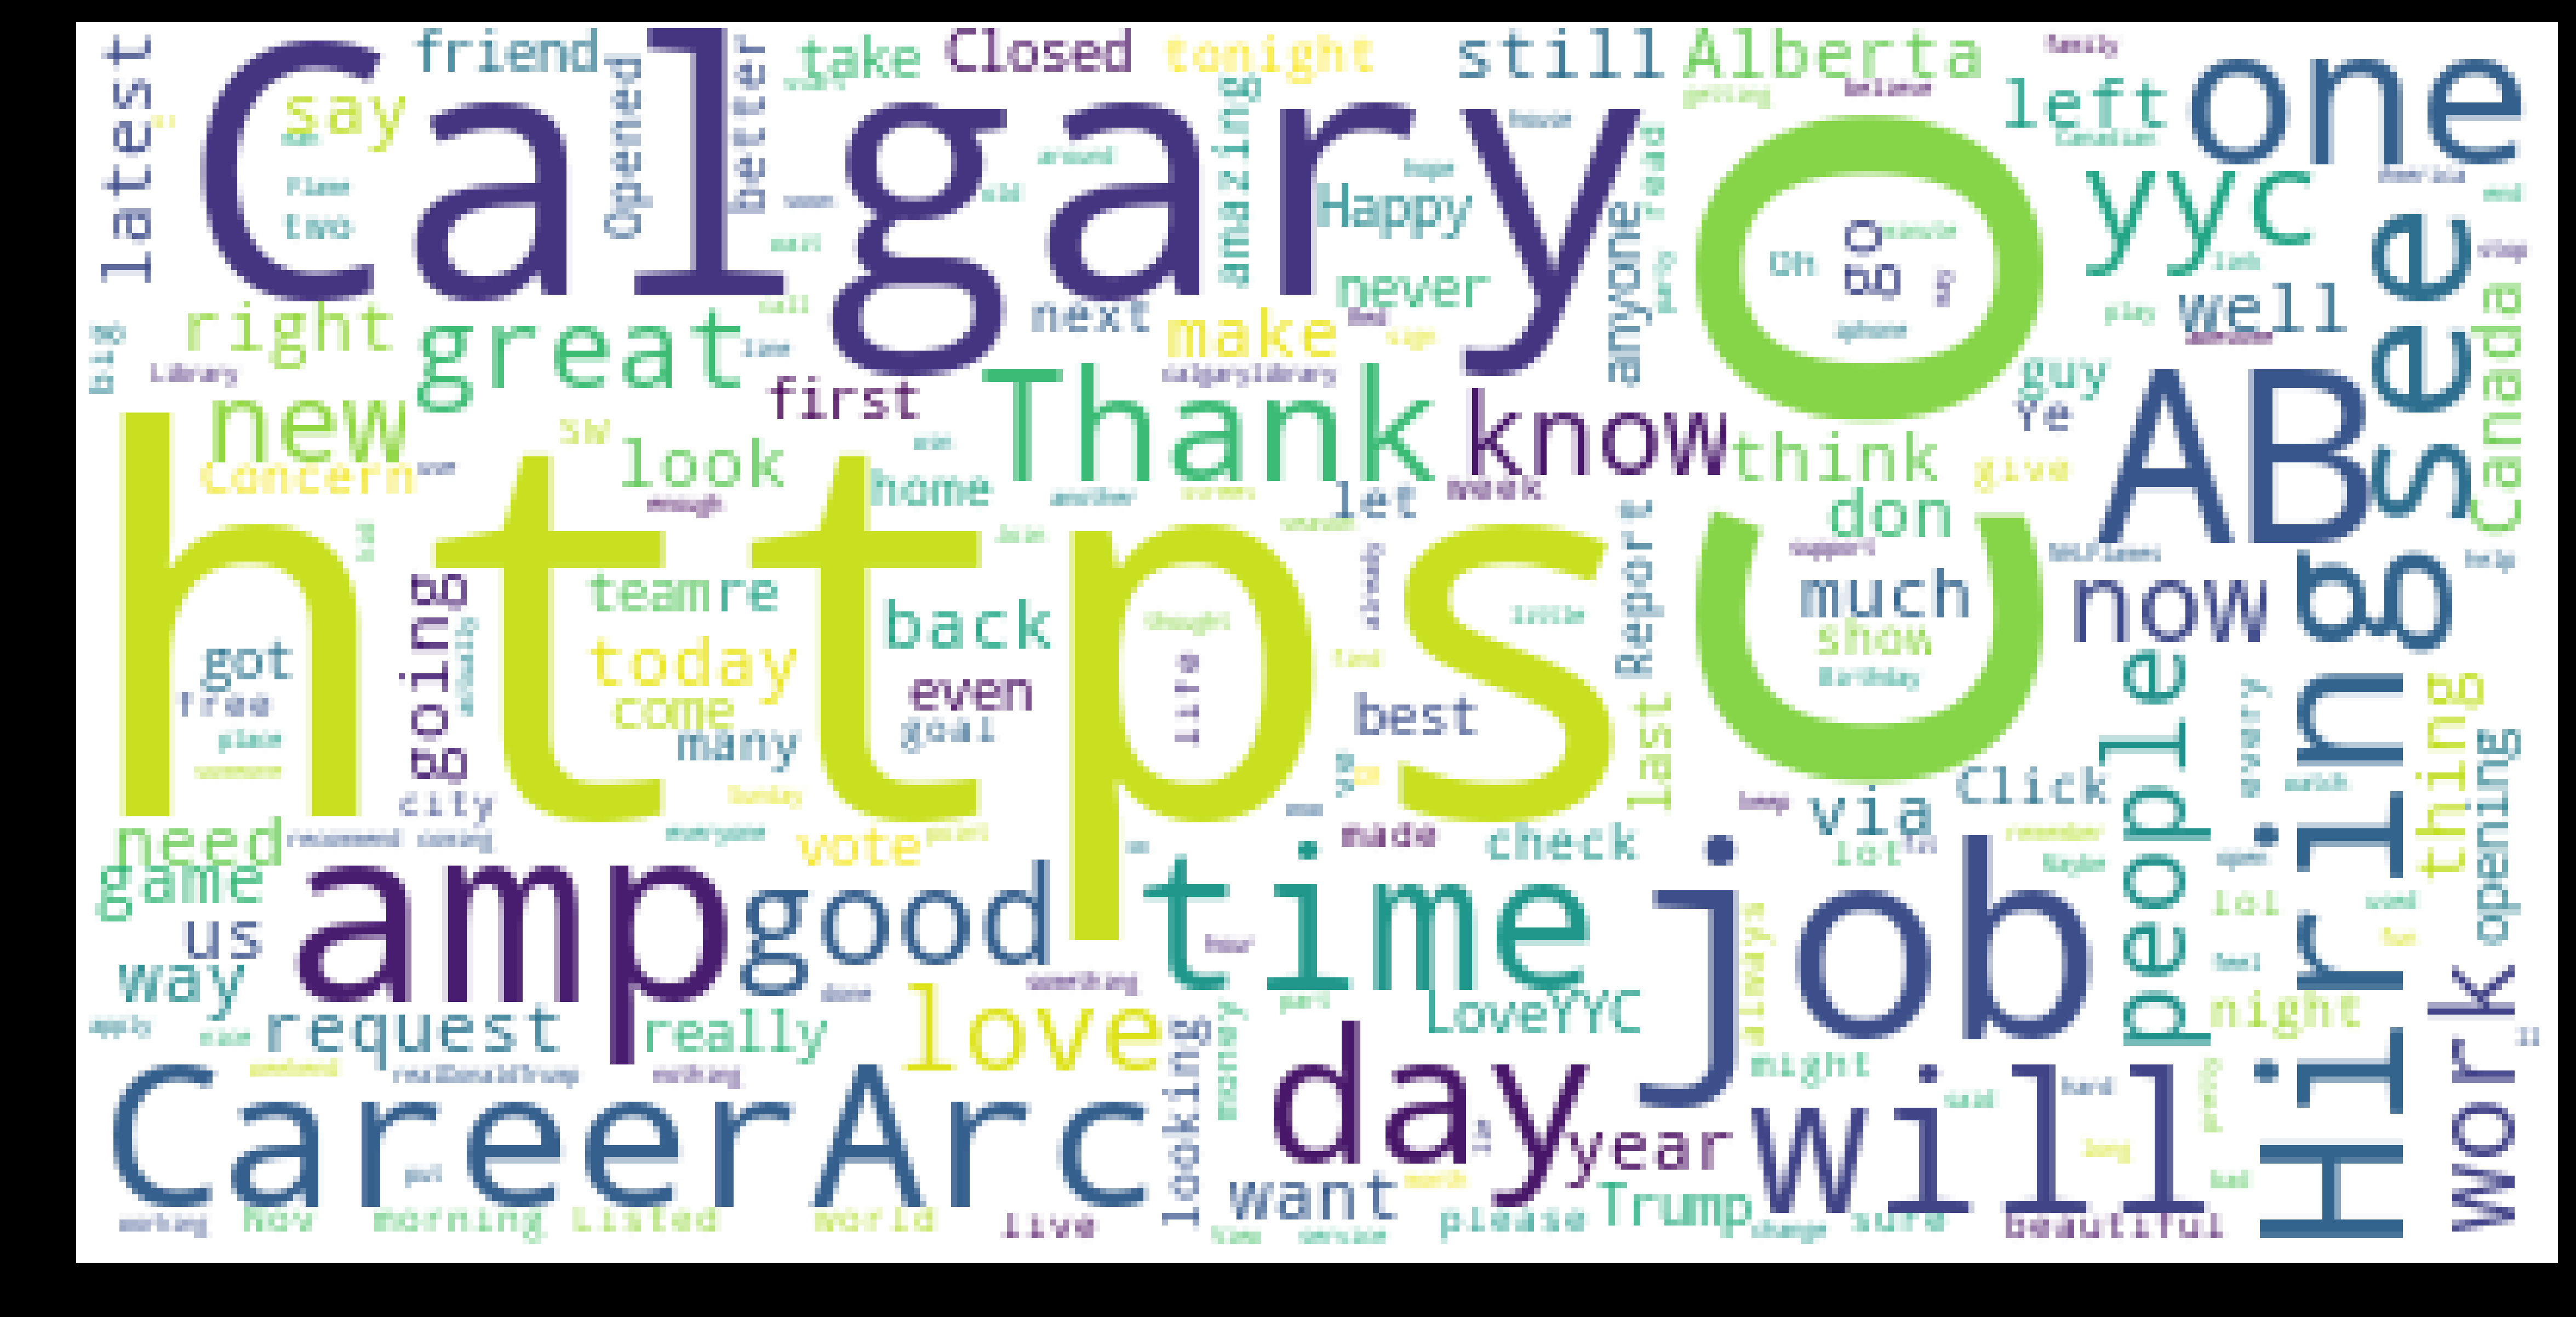

In [5]:
wordcloud(frame,'extended_tweet') 

In [6]:
frame['extended_tweet']=frame['extended_tweet'].str.replace('http\S+|www.\S+', '', case=False)

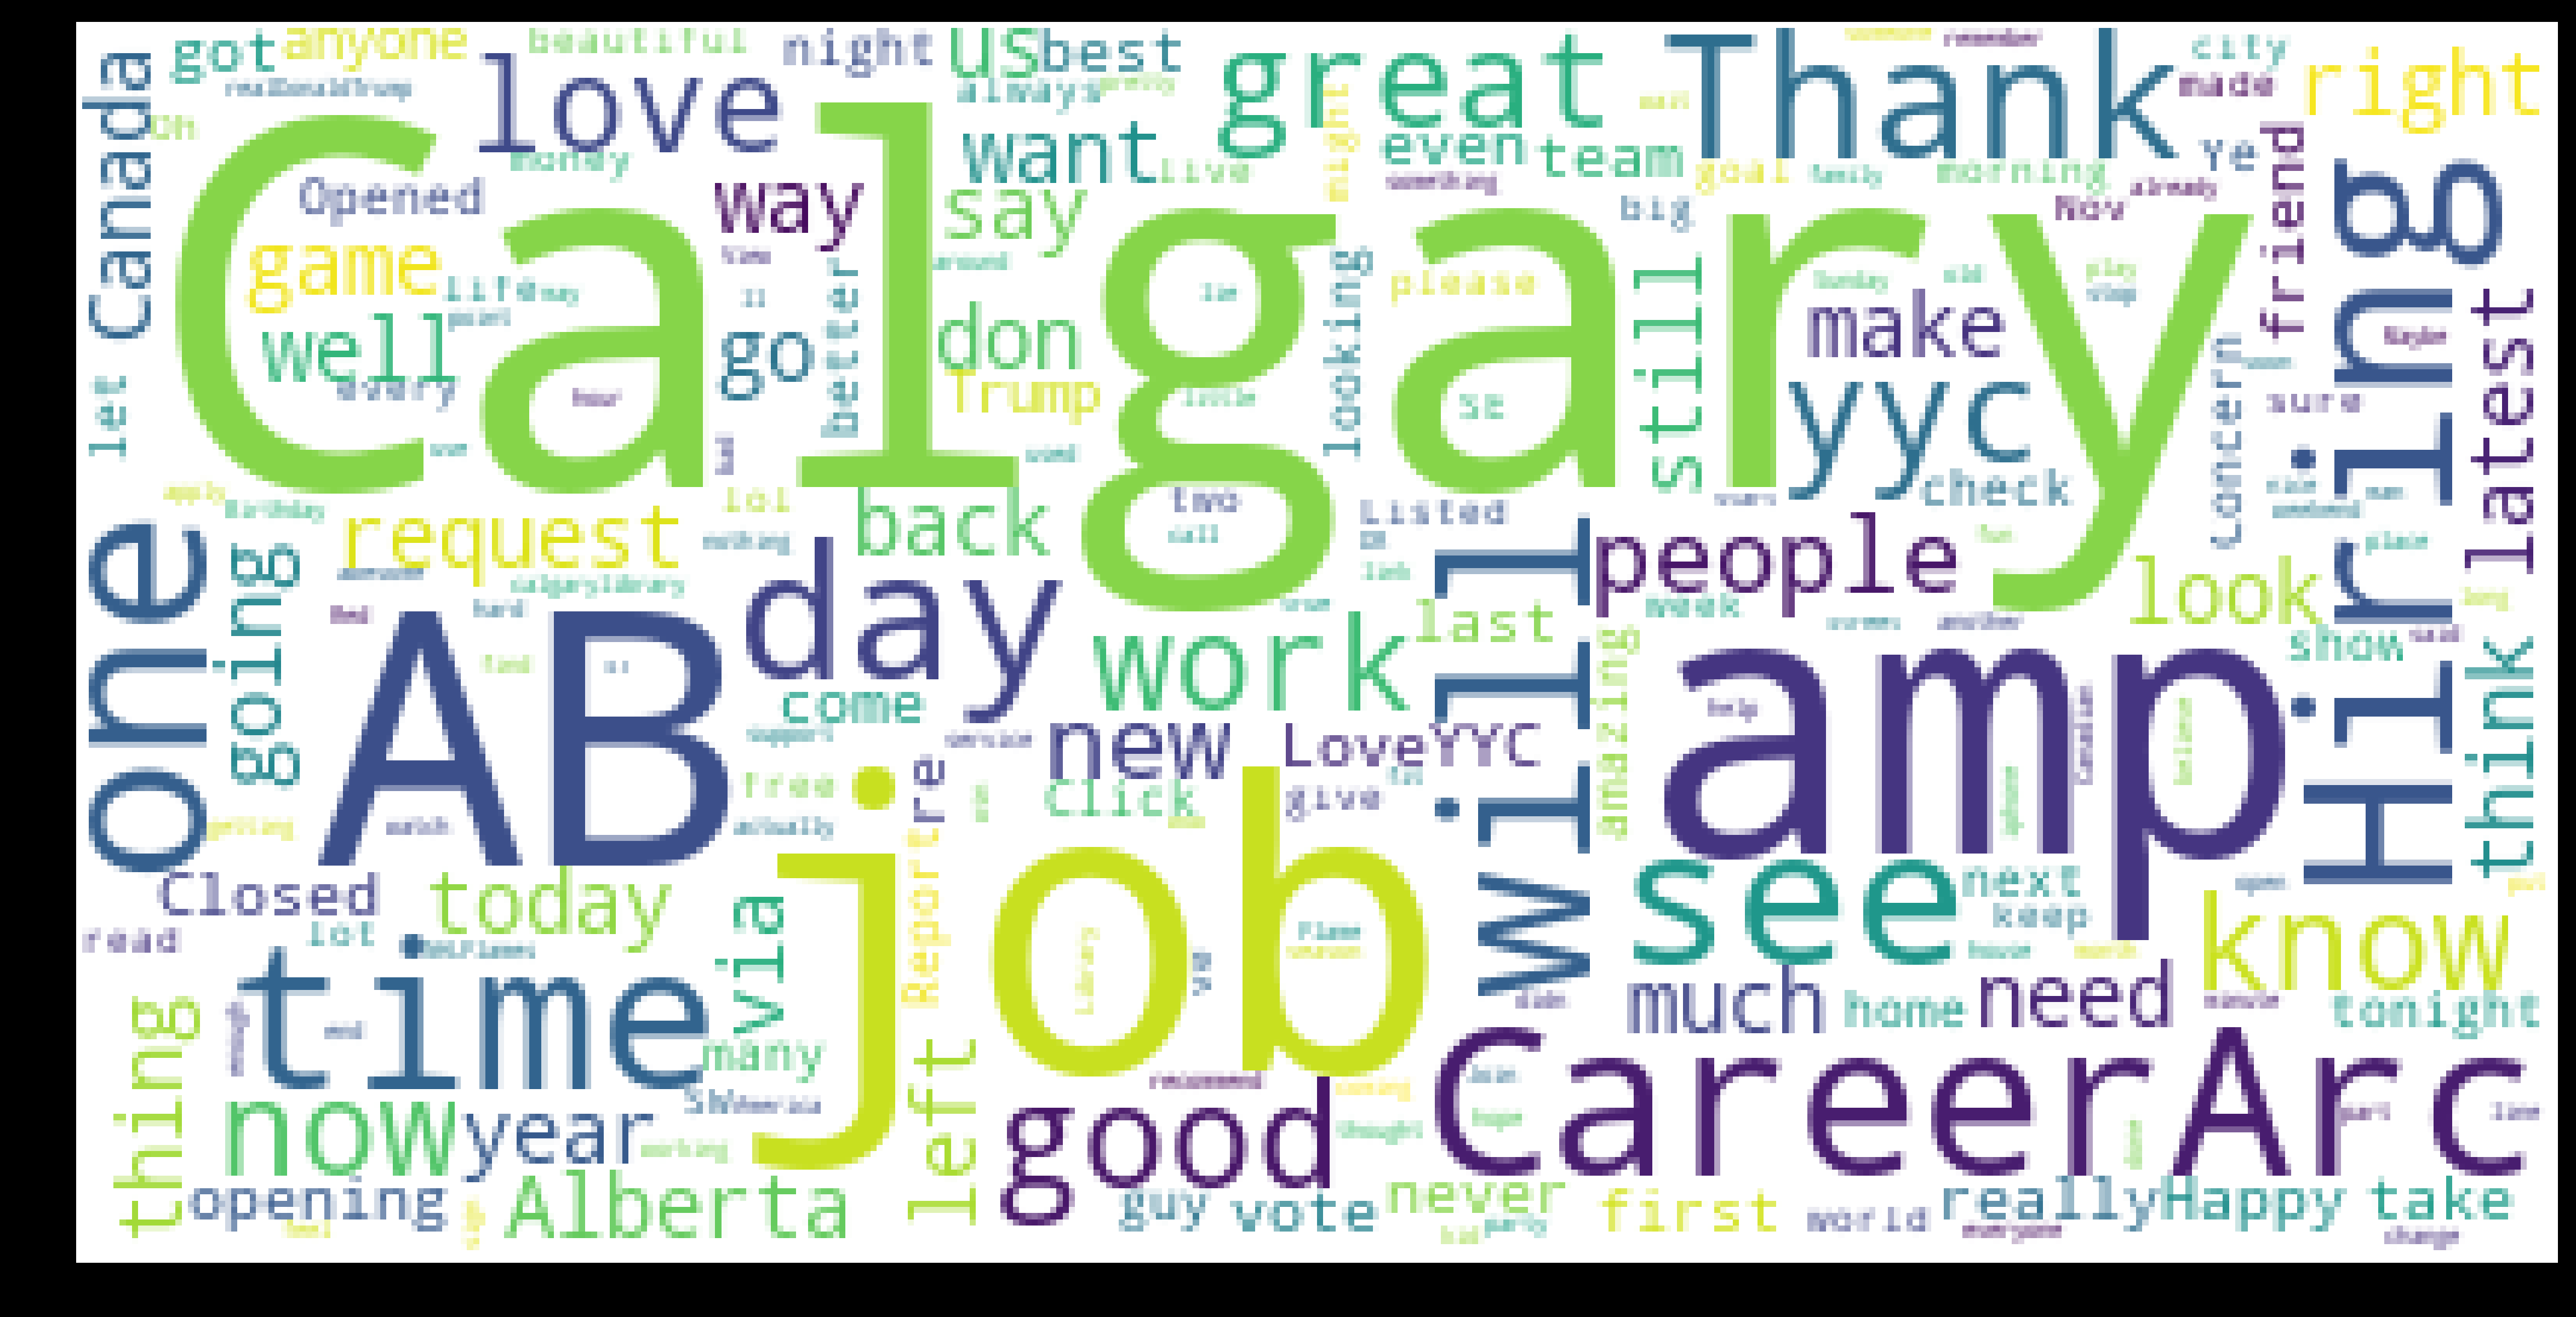

In [7]:
wordcloud(frame,'extended_tweet') 

In [32]:
frame['tweet_no_hashtags']=frame['extended_tweet'].str.replace('[@#]\w+', ' ',case=False)
#frame['tweet_no_hashtags']
#frame[frame['tweet_no_hashtags'].str.contains("amp")]['tweet_no_hashtags'].head()
frame['tweet_no_hashtags']=frame['tweet_no_hashtags'].str.replace('&amp',' ',case=False)
frame[frame['tweet_no_hashtags'].str.contains("amp")]['tweet_no_hashtags'].head()

6       Please read and share and donate ten bucks. T...
69     Closed Report Concern Not Listed request at 31...
128    Neat example of the value of research on “non-...
132          A friend saw a person using a cane on th...
220    Voters want every vote to count.\n\nThe rich a...
Name: tweet_no_hashtags, dtype: object

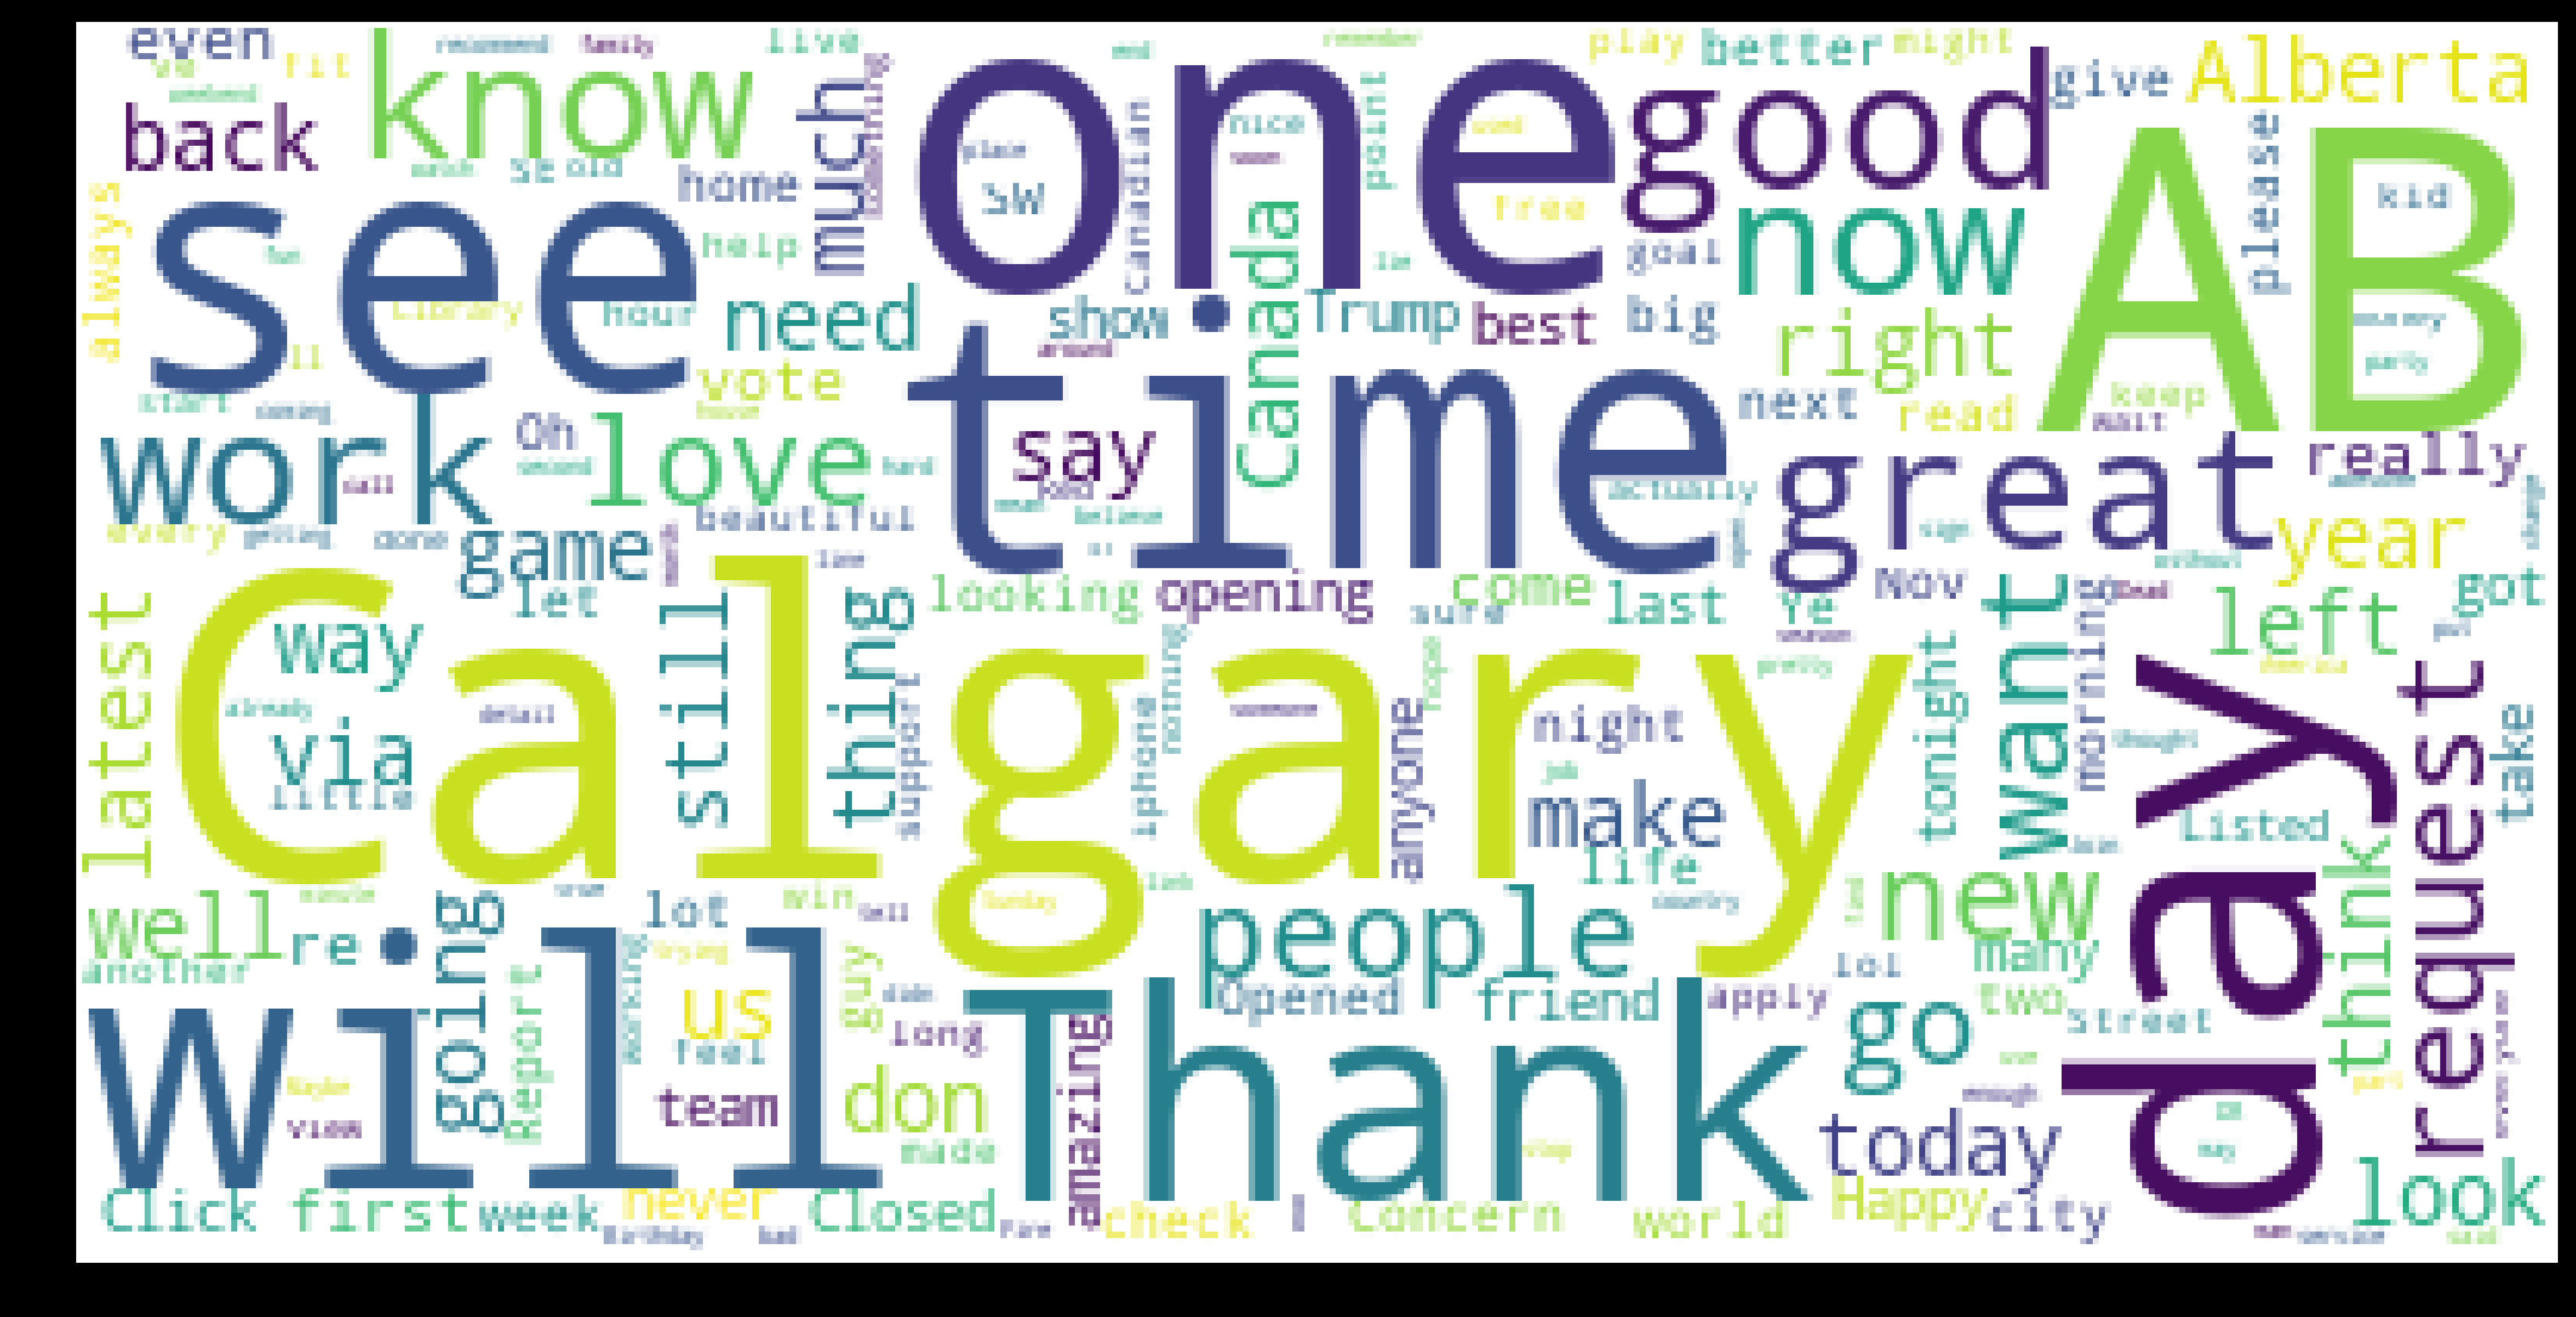

In [33]:
wordcloud(frame,'tweet_no_hashtags') 

In [20]:
print(frame.loc[4,'extended_tweet'])
print(frame.loc[4,'hashtags'])

See our latest #Calgary, AB #job and click to apply: barista - Store# 54359, CHINOOK CENTRE FOOD COURT -  #Retail #Hiring #CareerArc
[{'indices': [15, 23], 'text': 'Calgary'}, {'indices': [28, 32], 'text': 'job'}]


In [9]:
def convertHashToString(v):
    v=' '.join([d['text'] for d in v])
    return v
frame['hashtags_string']= frame['hashtags'].map(convertHashToString)
frame.loc[2,'hashtags_string']

'job Calgary SupplyChain Hiring CareerArc'

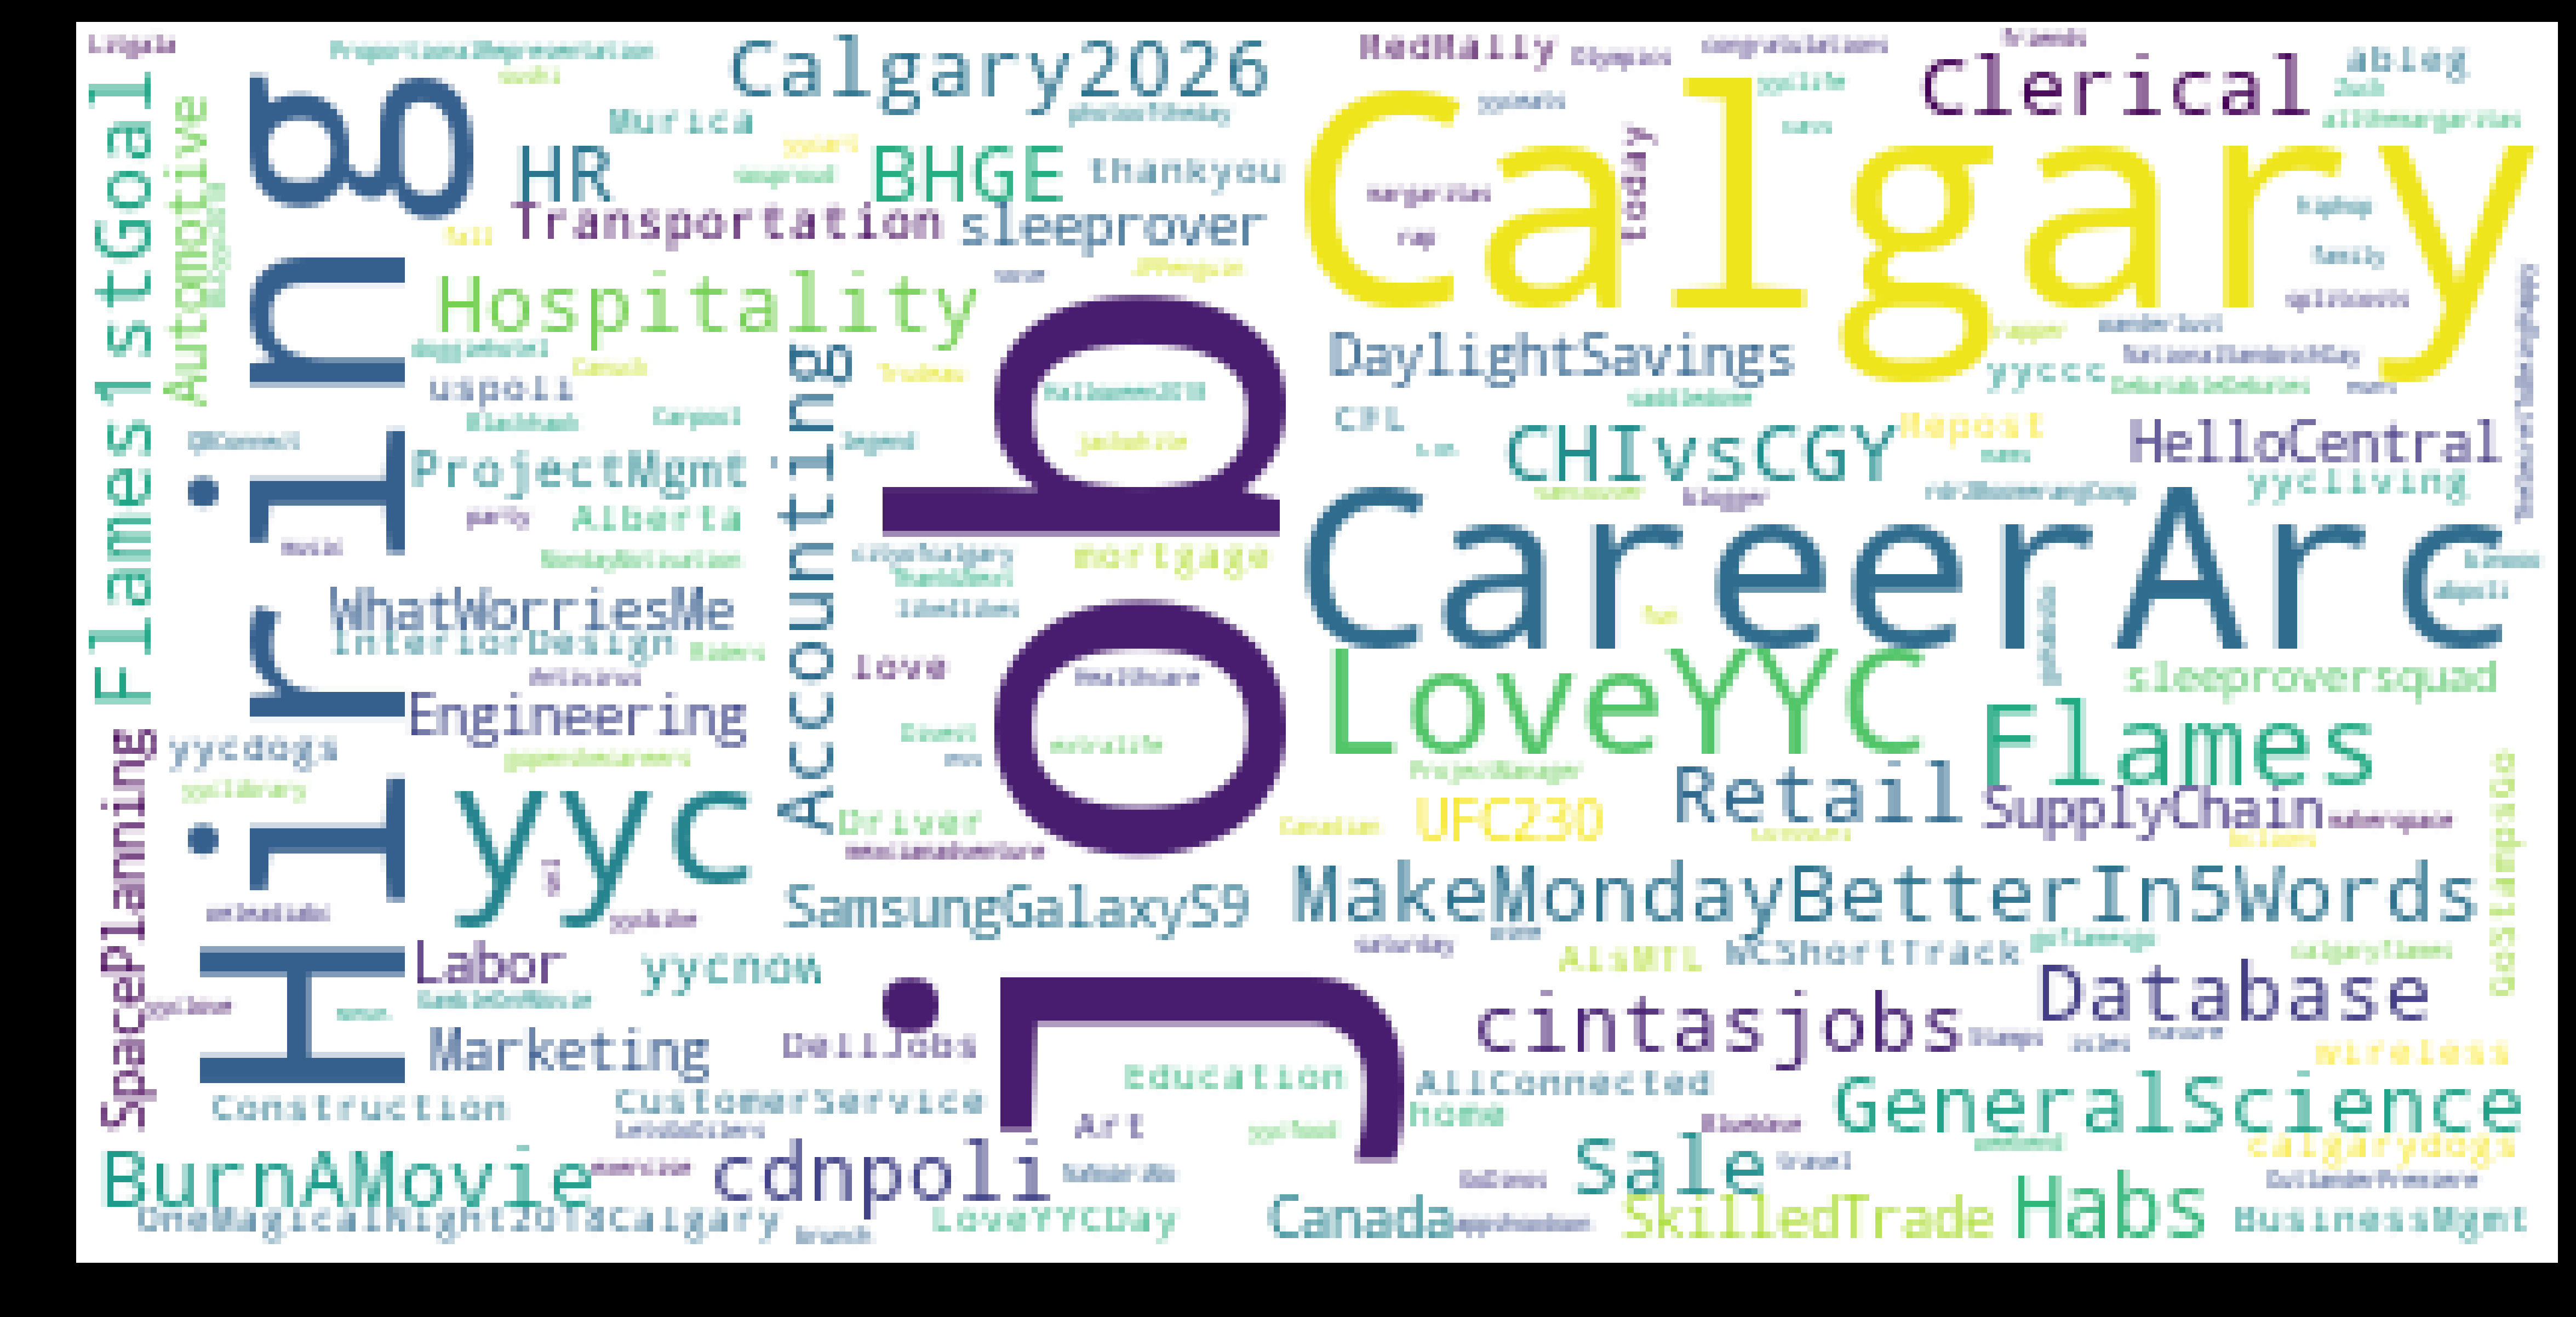

In [10]:
wordcloud(frame,'hashtags_string')

In [34]:
print(frame.loc[0,'extended_tweet'])
print(frame.loc[0,'user_mentions'])

@Symin16 I’d like to know who
[{'indices': [0, 8], 'id': 1031043960968364034, 'screen_name': 'Symin16', 'id_str': '1031043960968364034', 'name': 'Cory Baxter'}]


In [36]:
def convertUserToString(v):
    v=' '.join([d['screen_name'] for d in v])
    return v
frame['user_string']= frame['user_mentions'].map(convertUserToString)
frame.loc[0,'user_string']

'Symin16'

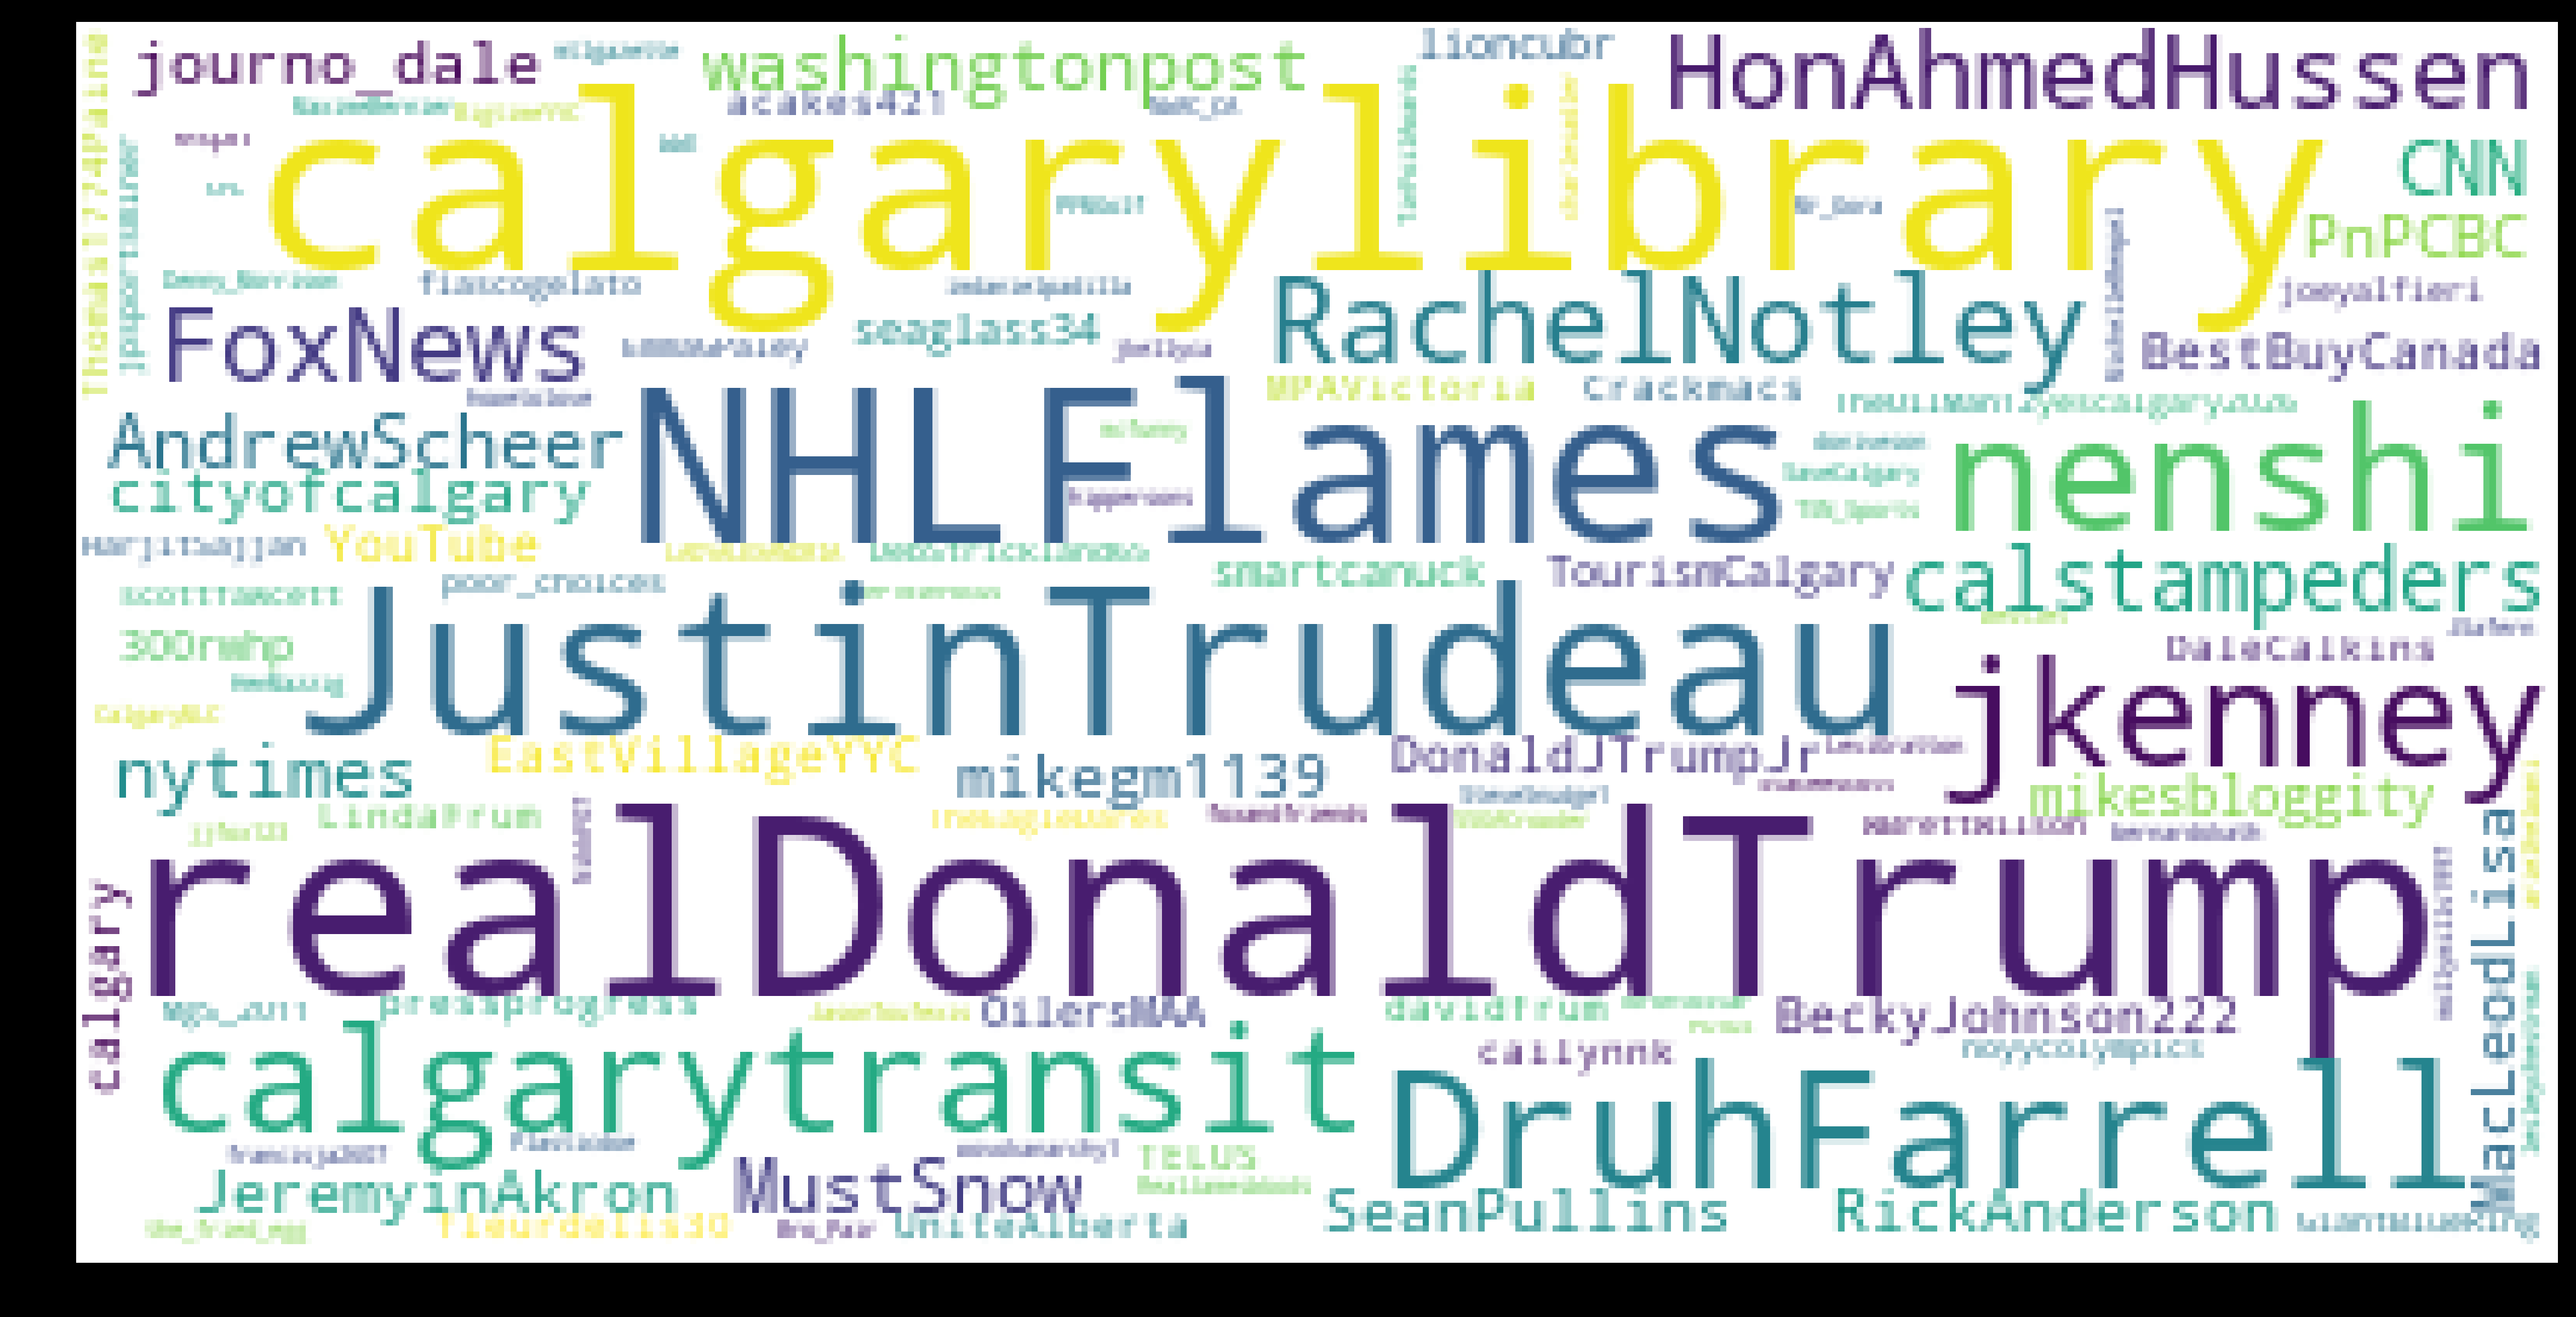

In [37]:
wordcloud(frame,'user_string')